In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
wine_data = pd.read_csv('winequality-red.csv')

# Display the first few rows of the dataset
print("Data shape:", wine_data.shape)
print("\nData info:")
print(wine_data.info())

Data shape: (1599, 12)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
# Display data description
print("\nData description:\n", wine_data.describe())

# Check for missing values
print("\nMissing values:", wine_data.isnull().sum())


Data description:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000          

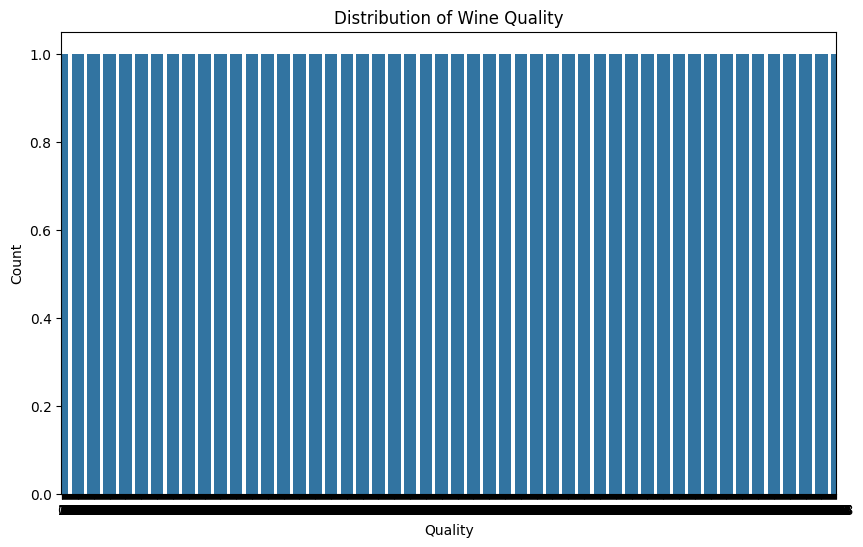

In [3]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
sns.countplot(wine_data['quality'])
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [13]:
# Split the data into features (X) and target (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 7],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2, 3]
}

# Initialize the model and perform hyperparameter tuning
model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=3, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 7, 'learning_rate': 0.1}


In [12]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8557457212713936

Classification Report:
               precision    recall  f1-score   support

           3       0.97      0.98      0.98       132
           4       0.91      0.96      0.94       131
           5       0.72      0.74      0.73       150
           6       0.72      0.62      0.66       155
           7       0.86      0.92      0.89       116
           8       0.97      0.97      0.97       134

    accuracy                           0.86       818
   macro avg       0.86      0.87      0.86       818
weighted avg       0.85      0.86      0.85       818


Confusion Matrix:
 [[130   1   1   0   0   0]
 [  0 126   2   3   0   0]
 [  2   5 111  29   3   0]
 [  2   6  39  96  10   2]
 [  0   0   1   6 107   2]
 [  0   0   0   0   4 130]]


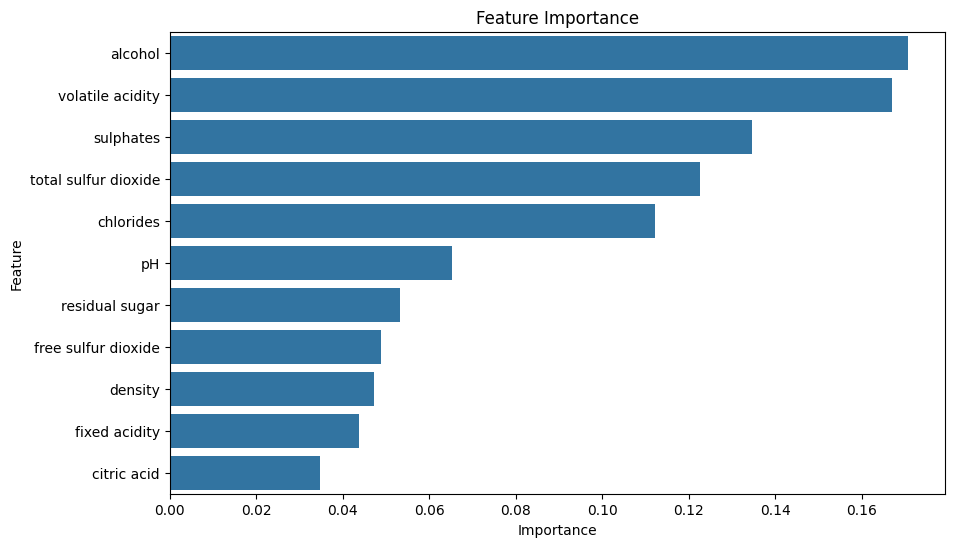

In [14]:
# Display feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [15]:
print("Model training and evaluation completed successfully!")

Model training and evaluation completed successfully!
